In [1]:
import fipy
from fipy import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from diffsolver import diffsolver
######################################################################
# Plot configurations
# mpl.style.use('classic')
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['lines.dashed_pattern'] = [6, 6]
mpl.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
mpl.rcParams['lines.dotted_pattern'] = [1, 3]
mpl.rcParams['lines.scale_dashes'] = False

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0
######################################################################
%matplotlib inline

In [2]:
L = 1.
nx = 1000
dx = L / nx

peclet = 142.
D = 1/peclet 
convCoeff = (1,)

tend = 3.5
alfa1   = 10
dt      = alfa1*dx
steps = int(tend/dt)

valueLeft = 1.
valueRight = 0.

In [3]:
# initial and boundary conditions
mesh = Grid1D(nx=nx, dx=dx)
phi = CellVariable(name="solution variable", 
                   mesh=mesh,
                   value=0.)

phi.faceGrad.constrain(valueRight, where=mesh.facesRight)
# phi.constrain(valueRight, where=mesh.facesRight)
phi.constrain(valueLeft, where=mesh.facesLeft)

x = mesh.cellCenters[1]

cout = 0 * np.ndarray(steps+1)
pv = np.arange(0,tend+dt,dt)

In [4]:
# differential equation
eqI = (TransientTerm() - DiffusionTerm(coeff=D) + 
       ExponentialConvectionTerm(coeff=convCoeff) == 0)

# solving the equation
for step in range(steps):
        eqI.solve(var=phi, dt=dt)
        cout[step+1] = phi._value[-1]

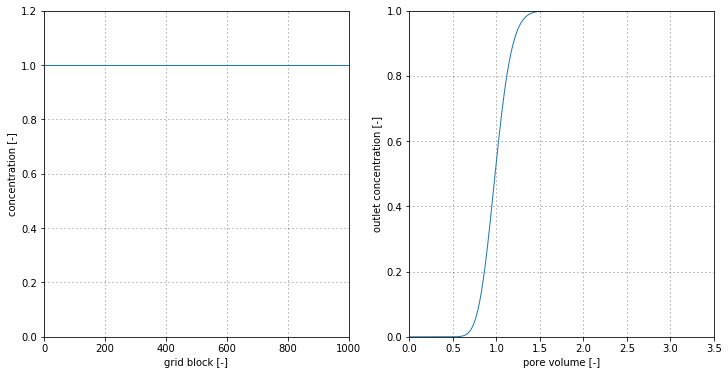

In [5]:
# plot
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.plot(np.linspace(0,nx,nx),phi._value)
plt.xlabel('grid block [-]')
plt.ylabel('concentration [-]')
plt.grid() 
plt.tight_layout
plt.ylim([0,1.2])

plt.subplot(1,2,2)
plt.plot(pv,cout)
plt.xlabel('pore volume [-]')
plt.ylabel('outlet concentration [-]')
plt.ylim([0,1])
plt.grid() 
plt.tight_layout;

In [16]:
TSVViewer(vars=(phi, phi.grad)).plot(filename="myTSV.tsv")